In [1]:
import glob
import numpy as np
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

name1='/home/chew/outputdata/keff/2D/orikfac0.01_N423_L6.5_50tm_1.0208582rm_meankt'
name2='/home/chew/outputdata/keff/2D/newkfac0.01_N423_L6.5_50tm_1.0208582rm_meankt'
#name1='/home/chew/outputdata/keff/2D/orikfac0.01_N753_L5_50tm_meankt'
#name2='/home/chew/outputdata/keff/2D/newkfac0.01_N756_L5_50tm_meankt'

t1,kt1=np.loadtxt(name1,delimiter=',')
t2,kt2=np.loadtxt(name2,delimiter=',')
T=[t1,t2]
KT=[kt1,kt2]

(1000,)
(1000,)


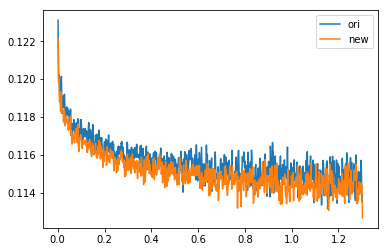

In [3]:
plt.plot(t1,kt1,label='ori')
plt.plot(t2,kt2,label='new')
print(t1.shape)
print(t2.shape)
plt.legend()

expected [0.12618064 0.12562659]
no of points 985
sq er fit1=0.0002426
no of points 985
sq er fit1=0.0001773


(0, 0.2)

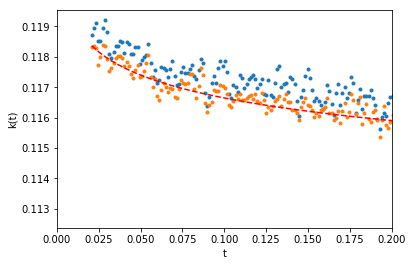

In [9]:
from scipy.optimize import curve_fit
import math
import numpy as np
from math import sqrt,pi,log
from scipy import special

D=1
kd= 4.0*pi*D
rm=0.005
td = (rm*2)**2/4/D
R=2*rm
f=1.0208582 
g = 0.577216
kaf=0.01
factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))            

def funcbk(t,C1,C2): #lattice kt for long time
    A=np.log(C2*t)+C3
    return C1*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)

def err(a,b):
    return ((a-b)*100/a)

def func(t,C1,C2): #lattice kt for long time
    b1=4*D/C2/C2
    A=np.log(b1*t)+4*pi*D/C1-2*g
    return 4*pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)

def func2(t,C2): #lattice kt for long time
    b1=48*D/R/R/f/f
    AA = 2*pi/math.sqrt(3)
    A=np.log(b1*t)+AA*(1./Pa-1)
    return AA*C2*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)/Pa

tol = 0.5
lb = lambda x: x-x*tol
ub = lambda x: x+x*tol
ka=kaf*kd 
#expt =[ka,R]
#expt =[2*sqrt(3)*Pa*D]
Pa1=ka*factor/D
Pa2=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
Pas = np.array([Pa1,Pa2])
expt =2*sqrt(3)*D*Pas
print('expected',expt)
fiterr=[]
tcut=800*td
cuts=[tcut]
for tcut in cuts:
    for i in range(len(KT)):
        #i+=1
        Pa = Pas[i]
        idx = T[i]>tcut
        x=T[i][idx]
        print('no of points',len(x))
        y=KT[i][idx]
        popt,pcov = curve_fit(func2,x,y)#,p0=[1],bounds=(-np.inf,np.inf))#,bounds=([lb(c1),lb(c2),lb(c3)],[ub(c1),ub(c2),ub(c3)]))#,sigma=sigma,absolute_sigma=False)
        perr = np.sqrt(np.diag(pcov))
        r1=sum((y-func2(x,*popt))**2)
        print('sq er fit1={:.7f}'.format(r1))
        #Er=[]
        #for j in range(len(expt)):
        #    Er.append(abs(err(expt[j],popt[j])))
        #    print('expected={:.4f}, fitted={:.5f}+-{:.5f}, error %={:.4f}'.format(expt[j],popt[j],perr[j],err(expt[j],popt[j])))
        #print('expected={:.4f}, fitted={:.5f}+-{:.5f}, error %={:.4f}'.format(expt[i],popt[j],perr[j],err(expt[i],popt[j])))
        plt.plot(x,y,'.',label='new')
        #plt.semilogx(x,func2(x,*popt),'-',label='fitted')
    #fiterr.append(max(Er))
plt.plot(x,func(x,ka,R),'r--')
plt.xlabel('t')
plt.ylabel('k(t)')
plt.xlim(0,0.2)

In [10]:
pi*Pa*D/popt[0]

0.8953696247737661

/home/chew/outputdata/keff/2D/orikfac0.01_N423_L6.5_50tm_1.0208582rm/*
N423
nosimrun 30000


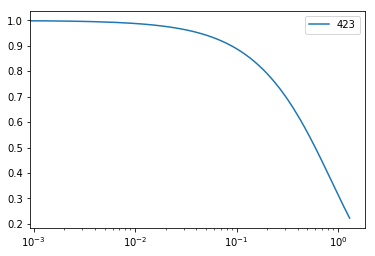

In [151]:
import glob
import numpy as np
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

L=5
L=6.5
f=1.0208582
kaf=0.01
#kaf=100
Ns=[2010,2017] 
Ns=[251,252]
#Ns=[252,252]
Ns=[423,423]
#Ns=[753,756]
#conc=10#10,30,80
#actualA = [25.1282,25.2217]
#actualA = [25.2217,25.2217]
actualA=[42.3799,42.3799]

def calk(stsim,t,C): #get kt from st
    dst = (stsim[2:]-stsim[:-2])/(t[2:]-t[:-2])
    dst=np.append((stsim[1]-stsim[0])/(t[1]-t[0]),dst)
    dst=np.append(dst,(stsim[-1]-stsim[-2])/(t[-1]-t[-2])  )
    return -dst/stsim/C

def calk2(stsim,t,C): #get kt from st
    h = t[1]-t[0]
    dst=[]
    for i in range(len(stsim)-4):
        y=(-stsim[i+4]+8*stsim[i+3]-8*stsim[i+1]+stsim[i])
        dst.append(y)
    dst = np.array(dst)/12/h
    dst=np.append((stsim[2]-stsim[0])/2/h,dst)
    dst=np.append((stsim[1]-stsim[0])/h,dst)
    dst=np.append(dst,(stsim[-1]-stsim[-3])/2/h )
    dst=np.append(dst,(stsim[-1]-stsim[-2])/h )
    return -dst/stsim/C

patterns1 = ['/home/chew/outputdata/keff/2D/orikfac{}_N{}_L{}_50tm_{}rm/*'.format(kaf,Ns[0],L,f)]
            #'/home/chew/outputdata/keff/2D/newkfac{}_N{}_L{}_50tm/*'.format(kaf,Ns[1],L)]
#
#'/home/chew/outputdata/keff/2D/orikfac{}_N{}_L{}_50tm_{}rm/*'.format(kaf,Ns[0],L,f),
def getst(N,pattern,ds):   
    fns = glob.glob(pattern)
    y=0
    #fns= fns[:50]
    tlast=0
    for fn in fns:
        r=np.loadtxt(fn,delimiter=',')
        y+=np.array(r).T[1][::ds]
        if tlast==0:
            tlast=np.array(r).T[0][-1]
        assert(tlast==np.array(r).T[0][-1])
    x=np.array(r).T[0][::ds]
    print('nosimrun',len(fns))
    y/=float(len(fns))
    s=y/float(N)
    plt.semilogx(x,s,'-',label=str(N))
    #plt.ylim(0,1)
    return x,s       

TT=[]
ST=[]
for i,pattern in enumerate(patterns1):
    print(pattern)
    NN=Ns[i]
    print('N{}'.format(NN))
    t,st=getst(NN,pattern,1)    
    TT.append(t)
    ST.append(st)
plt.legend()


A 42.3799
conc 9.981146722856826


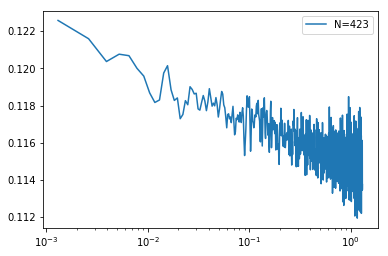

In [152]:
KT=[]
T=[]
for i,st in enumerate(ST):
    #pct=1
    Area=actualA[i]
    print('A',Area)
    #Area=Area*(1-pct/100.)
    #print('A',Area)
    NN=Ns[i]
    t=TT[i][1:]
    T.append(t)
    conc = NN/Area
    kt = calk(st,TT[i],conc)   
    print('conc',conc)
    KT.append(kt[1:])
    plt.semilogx(t,kt[1:],'-',label='N='+str(NN))
plt.legend()

Pa 0.03642521414769726,rv 0.0051042909999999995
Pa 0.0362652718503174,rv 0.0051042909999999995
0.11393006295054191 1.3026893306340497
Pa 0.03642521414769726,rv 0.0051042909999999995
Pa 0.03642521414769726,rv 0.0051042909999999995


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'ksim-ktheory for t>0.02, %')

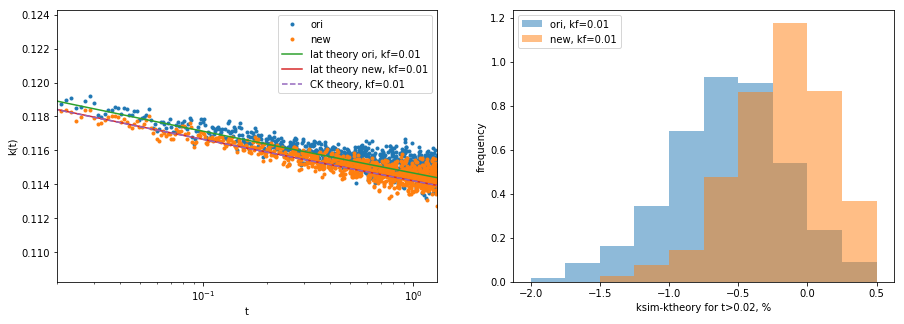

In [8]:
import math
import numpy as np
from math import sqrt,pi,log
from scipy import special
import mpmath as mp
import matplotlib.pyplot as plt
%matplotlib inline
mydehoog = mp.calculus.inverselaplace.deHoog(mp)

D=1
kd= 4.0*pi*D
rm=0.005
td = (rm*2)**2/4/D
tcut = 800*td
R=2*rm
f=1.0208582 
C=R/D**0.5
g = 0.577216
kz = lambda z: 2*np.pi*D*complex(z)**0.5*C*special.kv(1,C*(complex(z)**0.5))/complex(z)/special.kv(0,C*(complex(z)**0.5)) 

def ktl(kaf,t,pa): #lattice kt for long time
    ka = kaf*kd
    factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))            
    Pa=ka*factor/D
    voxelr =rm*f
    if pa=='new':  
        #voxelr=rm*f
        Pa=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
    C1 = 12*4*D/(voxelr*2)**2
    C2 = (1./Pa-1)*2*math.pi/sqrt(3)
    if pa=='ck':
        C1=4*D/R/R
        C2=4*pi*D/ka-2*g
    F = C1*t
    A=np.log(F)+C2
    t3=4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)
    print('Pa {},rv {}'.format(Pa,voxelr))
    return t3   

def invlt(kaf,t):    #inverse laplace transform of k(z)
    ka=kaf*kd  
    mp.dps = 15;
    fp= lambda z: ka/(complex(z)+ka/kz(z))
    t = mp.convert(t)
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

def err(a,b):
    return (a-b)*100/a

def diff(time,ksim):
    #ktck = np.array([invlt(kaf,t) for t in time]) #from inverse LT
    ktck = ktl(kaf,time,'ck')    
    return err(ktck,ksim)
    

fig,ax = plt.subplots(1,2,figsize=(15,5))
  #expected

tt=T[0][1:]
ktck = np.array([invlt(kaf,t) for t in tt]) #from inverse LT
orilat = ktl(kaf,tt,'ori')
newlat = ktl(kaf,tt,'new')
print(newlat[-1],tt[-1])
#ktck = ktl(kaf,tt,'ck')
#diffori = err(ktck,orilat)
#diffnew = err(ktck,newlat)

idx0 = T[0]>tcut

#simulation result
ax[0].semilogx(T[0][idx0],KT[0][idx0],'.',label='ori')
ax[0].set_ylim(ktck[-1]*0.95,ktck[tt>tcut][0]*1.05)
ax[0].set_xlim(tcut,T[0][-1])
ax[0].set_ylabel('k(t)')
ax[0].set_xlabel('t')

ax[1].hist(diff(T[0][idx0],KT[0][idx0]),range=(-2,0.5),normed=True,label='ori, kf='+str(kaf),alpha=0.5)

idx1 = T[1]>tcut
ax[0].semilogx(T[1][idx1],KT[1][idx1],'.',label='new')
ax[1].hist(diff(T[1][idx1],KT[1][idx1]),range=(-2,0.5),normed=True,label='new, kf='+str(kaf),alpha=0.5)
ax[0].plot(tt,orilat,'-',label='lat theory ori, kf='+str(kaf))
ax[0].semilogx(tt,newlat,'-',label='lat theory new, kf='+str(kaf))
ax[0].plot(tt,ktck,'--',label='CK theory, kf='+str(kaf))
ax[0].legend()
ax[1].legend()
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('ksim-ktheory for t>{}, %'.format(tcut))

sq er fit1=0.0000059
expected=12.5664, fitted=13.2461+-0.3926, error %=-5.4088
expected=40000.0000, fitted=42150.5723+-838717118.6509, error %=-5.3764
expected=98.8456, fitted=104.1721+-19898.5780, error %=-5.3887
sq er fit1=0.0000053
expected=12.5664, fitted=12.0794+-0.2866, error %=3.8753
expected=40000.0000, fitted=38349.7877+-696522414.7985, error %=4.1255
expected=98.8456, fitted=94.7602+-18162.2725, error %=4.1331


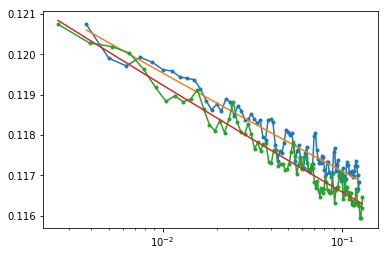

In [61]:
from scipy.optimize import curve_fit

def func(t,C1,C2,C3): #lattice kt for long time
    A=np.log(C2*t)+C3
    return C1*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4 )

tol = 0.1
ka=kaf*kd 
c1=4*pi*D
c2=4*D/R/R
c3=4*pi*D/ka-2*g
expt =[c1,c2,c3]
for i in range(2):
    idx = T[i]>tcut
    x=T[i][idx]
    y=KT[i][idx]
    popt,pcov = curve_fit(func,x,y,p0=[c1,c2,c3],bounds=([c1*tol,c2*tol,c3*tol],[c1*(tol+1),c2*(tol+1),c3*(tol+1)]))#,sigma=weight,absolute_sigma=False)
    perr = np.sqrt(np.diag(pcov))
    r1=y-func(x,*popt)
    print('sq er fit1={:.7f}'.format(sum(r1**2)))
    for j in range(3):
        print('expected={:.4f}, fitted={:.4f}+-{:.4f}, error %={:.4f}'.format(expt[j],popt[j],perr[j],err(expt[j],popt[j])))
    plt.plot(x,y,'.-',label='new')
    plt.semilogx(x,func(x,*popt),'-',label='fitted')

In [58]:
c1,c1*tol,c1*(tol+1)

(12.566370614359172, 3.7699111843077517, 16.336281798666924)